# *Poitoische*
###### **PyTorch is not an actual Torch for anyone wondering** <br>

fyi, I learned Pytorch in only 20 minutes...

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

### Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Function to generate synthetic data
def generate_data(num_samples=100, noise=0.2):
    # Generate random values for predictors
    X1 = np.random.rand(num_samples)
    X2 = np.random.rand(num_samples)
    X3 = np.random.rand(num_samples)

    # Generate target variable using a linear equation with noise
    # You can modify the coefficients as needed
    target = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, noise, num_samples)

    # Create a Pandas DataFrame
    data = pd.DataFrame({
        'X1': X1,
        'X2': X2,
        'X3': X3,
        'Y': target
    })

    return data

# Generate synthetic data with 100 samples and noise of 0.2
data = generate_data(num_samples=100, noise=0.2)




In [ ]:
data

,X1,X2,X3,Y
0,0.374540,0.031429,0.642032,1.815530
1,0.950714,0.636410,0.084140,3.806550
2,0.731994,0.314356,0.161629,3.078288
3,0.598658,0.508571,0.898554,4.197644
4,0.156019,0.907566,0.606429,3.539352
...,...,...,...,...
95,0.493796,0.349210,0.522243,2.976917
96,0.522733,0.725956,0.769994,4.503147
97,0.427541,0.897110,0.215821,3.995813
98,0.025419,0.887086,0.622890,3.643984


### Construct the Model Class

In [ ]:
class Niurel_Netwak_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Niurel_Netwak_Model, self).__init__()

        # Linear function 1: 3 -> 2
        self.fc1 = nn.Linear(input_dim, hidden_dim) # fc == fully connected
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 2 -> 2
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 2: 2 -> 2
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu3 = nn.ReLU()

        # Linear function 3 : 2 -> 1 (Output)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Output
        out = self.fc4(out)

        return out

### Define the Model

In [ ]:
input_dim = 3
hidden_dim = 1000
output_dim = 1
model = Niurel_Netwak_Model(input_dim, hidden_dim, output_dim)

### Define the Loss

$\frac{(prediksi - sebenarnya)^2}{banyak-prediksi}$

In [ ]:
mse = nn.MSELoss()

### Define the Learning Rate and Optimizer

In [ ]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

### Define the Iteration Count

In [ ]:
loss_list = []
iteration_number = 1000

### Training

In [ ]:
data

,X1,X2,X3,Y
0,0.374540,0.031429,0.642032,1.815530
1,0.950714,0.636410,0.084140,3.806550
2,0.731994,0.314356,0.161629,3.078288
3,0.598658,0.508571,0.898554,4.197644
4,0.156019,0.907566,0.606429,3.539352
...,...,...,...,...
95,0.493796,0.349210,0.522243,2.976917
96,0.522733,0.725956,0.769994,4.503147
97,0.427541,0.897110,0.215821,3.995813
98,0.025419,0.887086,0.622890,3.643984


In [ ]:
data.dtypes

X1    float64
X2    float64
X3    float64
Y     float64
dtype: object

In [ ]:
X = data[["X1", "X2", "X3"]].astype("float32").values
X = Variable(torch.from_numpy(X))
y = data[["Y"]].astype("float32").values
y = Variable(torch.from_numpy(y))

In [ ]:
for iteration in range(iteration_number):
    optimizer.zero_grad()

    results = model(X) # Maju
    loss = mse(results, y) # Loss Function
    loss.backward() # Backpropagation

    optimizer.step() # Update the w_i and b_i (Gradient Descent)

    loss_list.append(loss.data) # Keep the Loss (Error) Count

    # print loss
    if(iteration % 25 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 11.605154037475586
epoch 25, loss 0.8753554821014404
epoch 50, loss 1.1080849170684814
epoch 75, loss 0.39373111724853516
epoch 100, loss 0.47218087315559387
epoch 125, loss 0.2202843874692917
epoch 150, loss 0.23029825091362
epoch 175, loss 0.13506574928760529
epoch 200, loss 0.13368886709213257
epoch 225, loss 0.0948261097073555
epoch 250, loss 0.0941171869635582
epoch 275, loss 0.07564477622509003
epoch 300, loss 0.076321080327034
epoch 325, loss 0.06613250076770782
epoch 350, loss 0.06801873445510864
epoch 375, loss 0.061777811497449875
epoch 400, loss 0.06432466953992844
epoch 425, loss 0.059553928673267365
epoch 450, loss 0.062173403799533844
epoch 475, loss 0.05788449943065643
epoch 500, loss 0.06010039150714874
epoch 525, loss 0.056308843195438385
epoch 550, loss 0.05855492502450943
epoch 575, loss 0.05515952408313751
epoch 600, loss 0.05737418681383133
epoch 625, loss 0.05423847213387489
epoch 650, loss 0.05631643906235695
epoch 675, loss 0.05335894227027893
epoc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

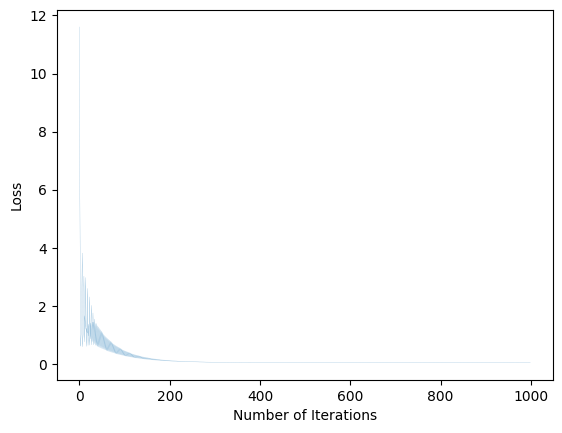

In [ ]:
plt.plot(range(iteration_number),loss_list, lw=0.1)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()